# SCACCHI

Questo dataset contiene delle partite prese da Lichess. L'obiettivo è creare un modello che, basandosi su rating, apertura ecc., preveda chi vincerà una partita del test set.
(https://www.kaggle.com/datasets/datasnaek/chess/data)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
df = pd.read_csv('/Users/gio/Desktop/Chess/games.csv')
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


Vediamo i rating dei giocatori.

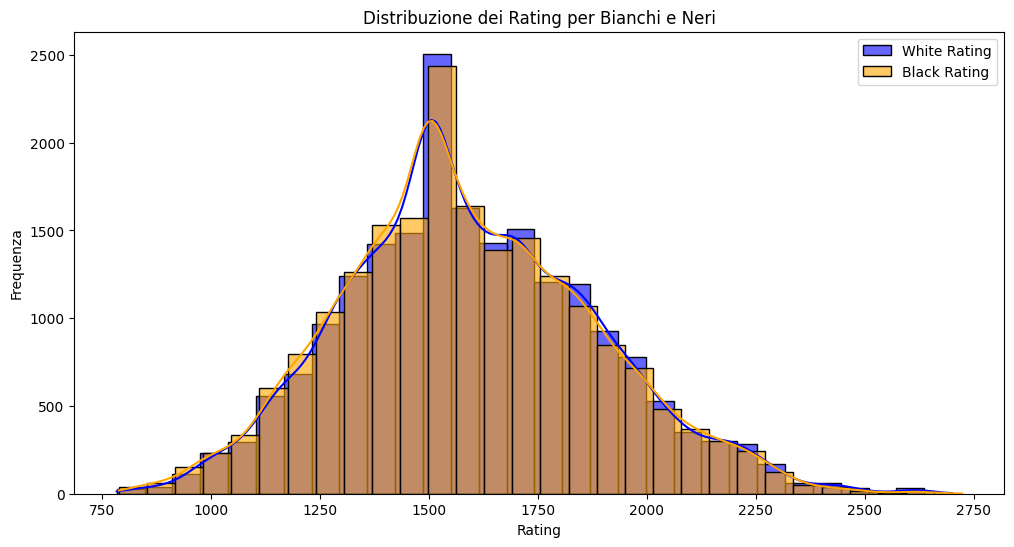

In [4]:
plt.figure(figsize=(12, 6))

sns.histplot(df['white_rating'], color='blue', bins=30, kde=True, label='White Rating', alpha=0.6)
sns.histplot(df['black_rating'], color='orange', bins=30, kde=True, label='Black Rating', alpha=0.6)


plt.title('Distribuzione dei Rating per Bianchi e Neri')
plt.xlabel('Rating')
plt.ylabel('Frequenza')
plt.legend()
plt.show()

In [5]:

white_rating_mean = df['white_rating'].mean()
black_rating_mean = df['black_rating'].mean()


white_rating_std = df['white_rating'].std()
black_rating_std = df['black_rating'].std()

print("rating medio bianchi: ", white_rating_mean)
print("rating medio neri: ", black_rating_mean)
print("deviazione standard bianchi: ", white_rating_std)
print("deviazione standrd neri: ", black_rating_std)

rating medio bianchi:  1596.6318675840064
rating medio neri:  1588.8319872370128
deviazione standard bianchi:  291.2533757370189
deviazione standrd neri:  291.03612596033423


Vediamo le aperture:

In [3]:
# Colonna 'winner'
df['winner'] = df['winner'].apply(lambda x: 'White' if x == 'white' else ('Black' if x == 'black' else 'Draw'))

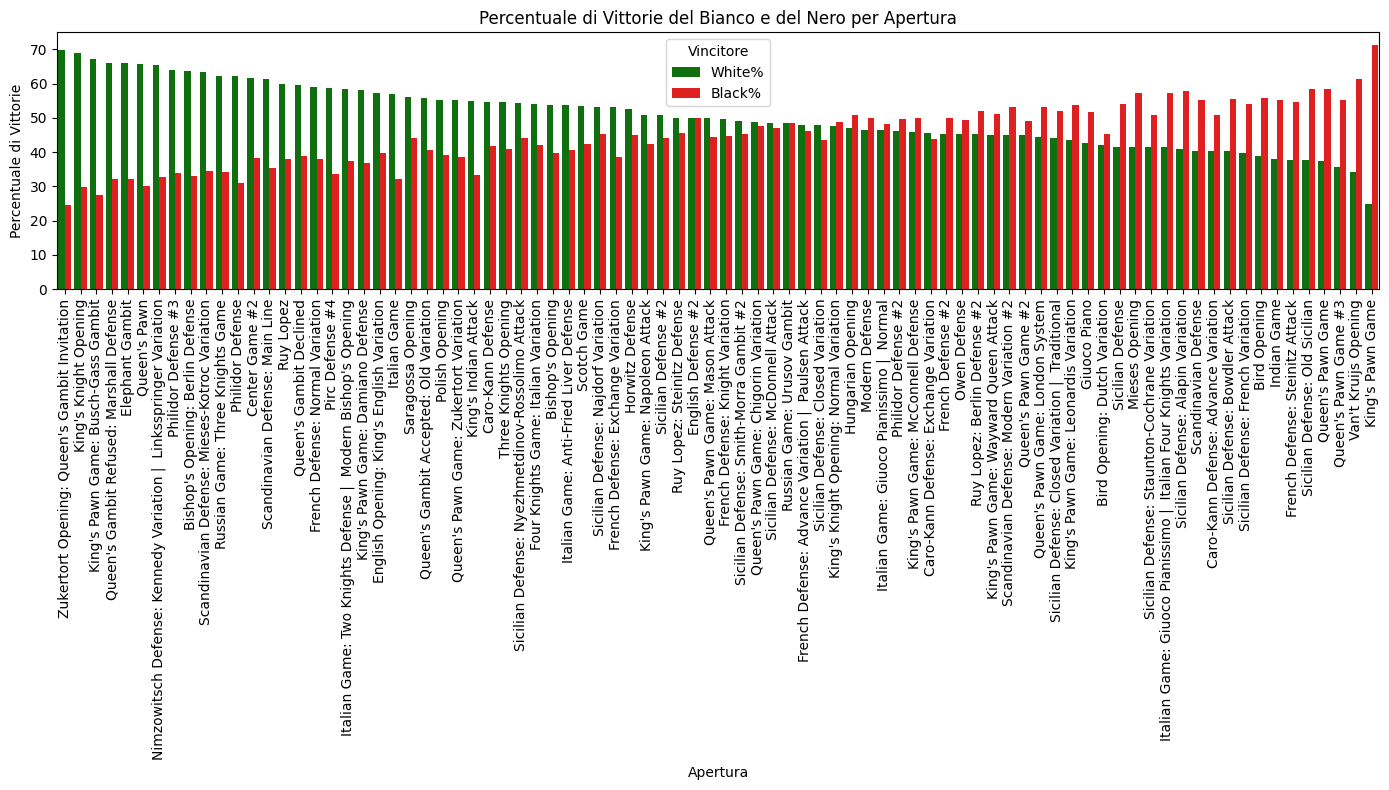

In [ ]:
# Percentuali di vittoria per ciascuna apertura
winning_stats = df.groupby(['opening_name', 'winner']).size().unstack(fill_value=0)

# Totale delle partite per ciascuna apertura
winning_stats['Total'] = winning_stats.sum(axis=1)

# Percentuale di vittorie
winning_stats['White%'] = (winning_stats['White'] / winning_stats['Total']) * 100
winning_stats['Black%'] = (winning_stats['Black'] / winning_stats['Total']) * 100

# Rimuovere aperture con meno di 50 partite per migliorare la leggibilità del grafico
winning_stats = winning_stats[winning_stats['Total'] >= 50]


plt.figure(figsize=(14, 8))
winning_stats = winning_stats.sort_values(by='White%', ascending=False)

sns.barplot(data=winning_stats.reset_index().melt(id_vars='opening_name', value_vars=['White%', 'Black%']),
            x='opening_name', y='value', hue='winner', palette=['green', 'red'])

plt.title('Percentuale di Vittorie del Bianco e del Nero per Apertura')
plt.xlabel('Apertura')
plt.ylabel('Percentuale di Vittorie')
plt.xticks(rotation=90)
plt.legend(title='Vincitore')
plt.tight_layout()
plt.show()

Notiamo che l'apertura con la più alta percentuale di vittoria del bianco è la Zukertort, una variande del Gambetto di Donna; mentre quella del nero è la partita di Re (un pò generico).

Data Cleaning:

In [4]:
df_cleaned = df.drop(columns=['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'increment_code', 'moves', 'opening_eco', 'opening_ply'])
df_cleaned.head()

,winner,white_id,white_rating,black_id,black_rating,opening_name
0,White,bourgris,1500,a-00,1191,Slav Defense: Exchange Variation
1,Black,a-00,1322,skinnerua,1261,Nimzowitsch Defense: Kennedy Variation
2,White,ischia,1496,a-00,1500,King's Pawn Game: Leonardis Variation
3,White,daniamurashov,1439,adivanov2009,1454,Queen's Pawn Game: Zukertort Variation
4,White,nik221107,1523,adivanov2009,1469,Philidor Defense


Adesso trasformiamo la colonna winner in numerico (1 vince il bianco, 0 il nero, 0.5 pareggio), e facciamo lo scaling dei rating.
Aggiungiamo anche la differenza di rating.

In [5]:
from sklearn.preprocessing import StandardScaler

df_cleaned['winner'] = df_cleaned['winner'].apply(lambda x: 1 if x == 'White' else (0 if x == 'Black' else 0.5))

scaler = StandardScaler()
df_cleaned[['white_rating', 'black_rating']] = scaler.fit_transform(df[['white_rating', 'black_rating']])

df_cleaned['rating_diff'] = df_cleaned['white_rating'] - df_cleaned['black_rating']
df_cleaned = df_cleaned.drop(columns = ['white_rating', 'black_rating'])

df_cleaned.head()

,winner,white_id,black_id,opening_name,rating_diff
0,1.0,bourgris,a-00,Slav Defense: Exchange Variation,1.035197
1,0.0,a-00,skinnerua,Nimzowitsch Defense: Kennedy Variation,0.183504
2,1.0,ischia,a-00,King's Pawn Game: Leonardis Variation,-0.040287
3,1.0,daniamurashov,adivanov2009,Queen's Pawn Game: Zukertort Variation,-0.077938
4,1.0,nik221107,adivanov2009,Philidor Defense,0.158936


Encoding frequenza apertura.

In [6]:
# Calcolo della frequenza di ciascuna apertura
opening_frequencies = df_cleaned['opening_name'].value_counts(normalize=True)

# Creazione di un dizionario mappando ogni apertura alla sua frequenza
opening_mapping = opening_frequencies.to_dict()

# Sostituzione dei nomi delle aperture con la loro frequenza
df_cleaned['opening_name'] = df_cleaned['opening_name'].map(opening_mapping)

# Verifica delle prime righe per controllare la trasformazione
print(df_cleaned[['opening_name']].head())

   opening_name
0      0.000947
1      0.000249
2      0.007678
3      0.005684
4      0.006730


In [43]:
# Colonna che rappresenta una coppia unica di giocatori
df['pair'] = df.apply(lambda row: tuple(sorted([row['white_id'], row['black_id']])), axis=1)

pair_stats = df.groupby(['pair', 'winner']).size().unstack(fill_value=0)
pair_stats = pair_stats.rename(columns={0: 'Black Wins', 1: 'White Wins', 0.5: 'Draws'})

pair_stats['Total Games'] = pair_stats.sum(axis=1)
pair_stats = pair_stats.sort_values(by='Total Games', ascending=False)

print(pair_stats.head(10))

winner                            Black  Draw  White  Total Games
pair                                                             
(crraii, thebadfish)                 11     2     19           32
(projetoxadrez, thebestofthebad)     14     0     15           29
(chesslearningpro, enricolord)       11     2     13           26
(lzchips, solidchess_hehe)           13     1     12           26
(chiggen, drakon1)                    9     0     16           25
(ahmedgomez, mahmoud_safyan)         12     1     10           23
(chesswithmom, schoonied)            10     0     12           22
(aaaaaaaddd, cfc52)                   6     0     14           20
(dkattir, mansoor_k11)               11     0      8           19
(duckduckfrog, smartduckduckcow)     15     0      3           18


Le coppie sembrano equilibrate. Togliamo.

In [10]:
df_cleaned.head()

,winner,white_id,black_id,opening_name,rating_diff
0,1.0,bourgris,a-00,0.000947,1.035197
1,0.0,a-00,skinnerua,0.000249,0.183504
2,1.0,ischia,a-00,0.007678,-0.040287
3,1.0,daniamurashov,adivanov2009,0.005684,-0.077938
4,1.0,nik221107,adivanov2009,0.006730,0.158936


Colonne familiarity: indicano la percentuale di partite vinte, per bianco e per nero, con quell'apertura. Esempio: se il giocatore bianco ha giocato 20 partite con l’apertura “Ruy Lopez” e ha vinto 12 di queste, la sua familiarità con quella apertura sarà del 60%.

In [ ]:
# Calcolare la percentuale di vittorie per apertura per ciascun giocatore (per bianco e per nero separatamente)
# Creiamo un dataframe con solo i giocatori bianchi
df_white = df_cleaned[df_cleaned['winner'] == 1].groupby(['white_id', 'opening_name']).size().reset_index(name='white_wins')
df_white['white_win_percentage'] = df_white.groupby('white_id')['white_wins'].transform(lambda x: x / x.sum() * 100)

# Creiamo un dataframe con solo i giocatori neri
df_black = df_cleaned[df_cleaned['winner'] == 0].groupby(['black_id', 'opening_name']).size().reset_index(name='black_wins')
df_black['black_win_percentage'] = df_black.groupby('black_id')['black_wins'].transform(lambda x: x / x.sum() * 100)

# Uniamo i dati del bianco con il nero usando l'opening_name come chiave
df_openings = pd.merge(df_white[['white_id', 'opening_name', 'white_win_percentage']],
                       df_black[['black_id', 'opening_name', 'black_win_percentage']],
                       left_on=['white_id', 'opening_name'], 
                       right_on=['black_id', 'opening_name'], 
                       how='outer')

# Calcoliamo la familiarità come la media delle percentuali di vittoria per ciascun giocatore
df_openings['familiarity'] = df_openings[['white_win_percentage', 'black_win_percentage']].mean(axis=1)
df_openings.rename(columns={'white_win_percentage': 'familiarity_white', 'black_win_percentage': 'familiarity_black'}, inplace=True)

# Aggiungiamo la colonna 'familiarity', sia per il bianco che per il nero
df_cleaned = pd.merge(df_cleaned, df_openings[['white_id', 'opening_name', 'familiarity_white']], 
                      left_on=['white_id', 'opening_name'], right_on=['white_id', 'opening_name'], how='left')

df_cleaned = pd.merge(df_cleaned, df_openings[['black_id', 'opening_name', 'familiarity_black']], 
                      left_on=['black_id', 'opening_name'], right_on=['black_id', 'opening_name'], how='left')

# Sostituire i NaN con 0 (nessuna vittoria con quella apertura)
df_cleaned['familiarity_white'] = df_cleaned['familiarity_white'].fillna(0)
df_cleaned['familiarity_black'] = df_cleaned['familiarity_black'].fillna(0)


print(df_cleaned[['white_id', 'black_id', 'opening_name', 'familiarity_white', 'familiarity_black']].head())

        white_id      black_id  opening_name  familiarity_white  \
0       bourgris          a-00      0.000947              100.0   
1           a-00     skinnerua      0.000249                0.0   
2         ischia          a-00      0.007678              100.0   
3  daniamurashov  adivanov2009      0.005684               40.0   
4      nik221107  adivanov2009      0.006730              100.0   

   familiarity_black  
0                0.0  
1              100.0  
2                0.0  
3                0.0  
4                0.0  


In [8]:
df_cleaned.head()

,winner,white_id,black_id,opening_name,rating_diff,familiarity_white,familiarity_black
0,1.0,bourgris,a-00,0.000947,1.035197,100.0,0.0
1,0.0,a-00,skinnerua,0.000249,0.183504,0.0,100.0
2,1.0,ischia,a-00,0.007678,-0.040287,100.0,0.0
3,1.0,daniamurashov,adivanov2009,0.005684,-0.077938,40.0,0.0
4,1.0,nik221107,adivanov2009,0.006730,0.158936,100.0,0.0


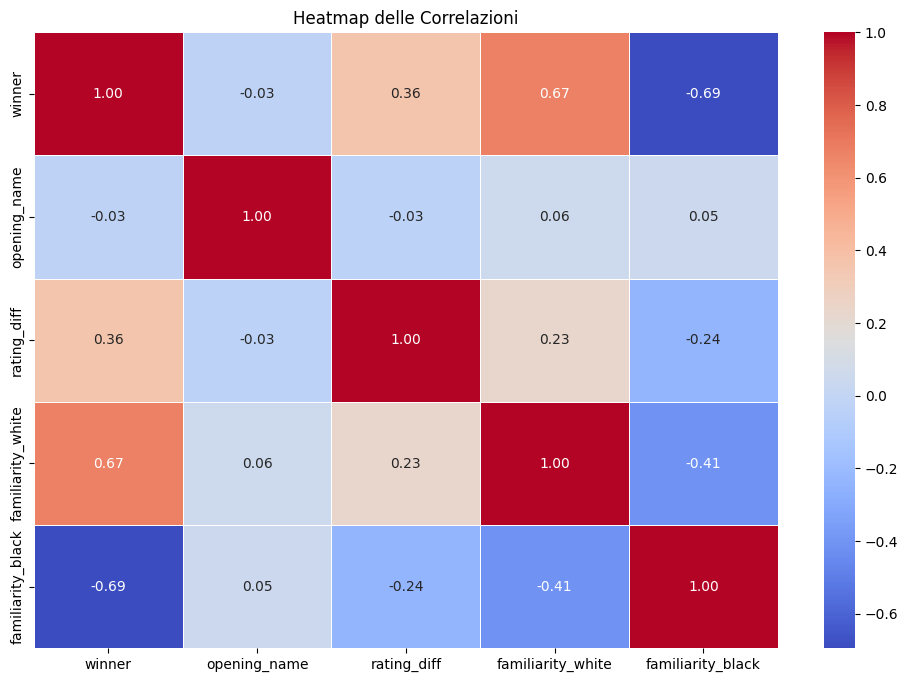

In [9]:
df3 = df_cleaned.drop(columns = ['white_id', 'black_id'])

corr_matrix = df3.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap delle Correlazioni')
plt.show()

Random Forest Train.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


X = df3[['rating_diff', 'familiarity_white', 'familiarity_black']]

y = df3['winner']
y = y[y != 0.5]  # Escludiamo i pareggi
X = X.iloc[y.index] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling delle feature numeriche
scaler = StandardScaler()
X_train[['rating_diff', 'familiarity_white', 'familiarity_black']] = scaler.fit_transform(X_train[['rating_diff', 'familiarity_white', 'familiarity_black']])
X_test[['rating_diff', 'familiarity_white', 'familiarity_black']] = scaler.transform(X_test[['rating_diff', 'familiarity_white', 'familiarity_black']])

# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Addestramento e predizione
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Valutazione
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9861
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1832
         1.0       0.98      0.99      0.99      1990

    accuracy                           0.99      3822
   macro avg       0.99      0.99      0.99      3822
weighted avg       0.99      0.99      0.99      3822



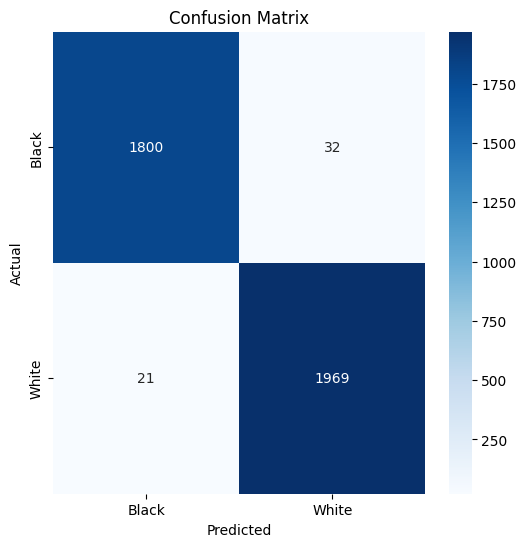

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Black', 'White'], yticklabels=['Black', 'White'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**ACCURACY: 98.6%**